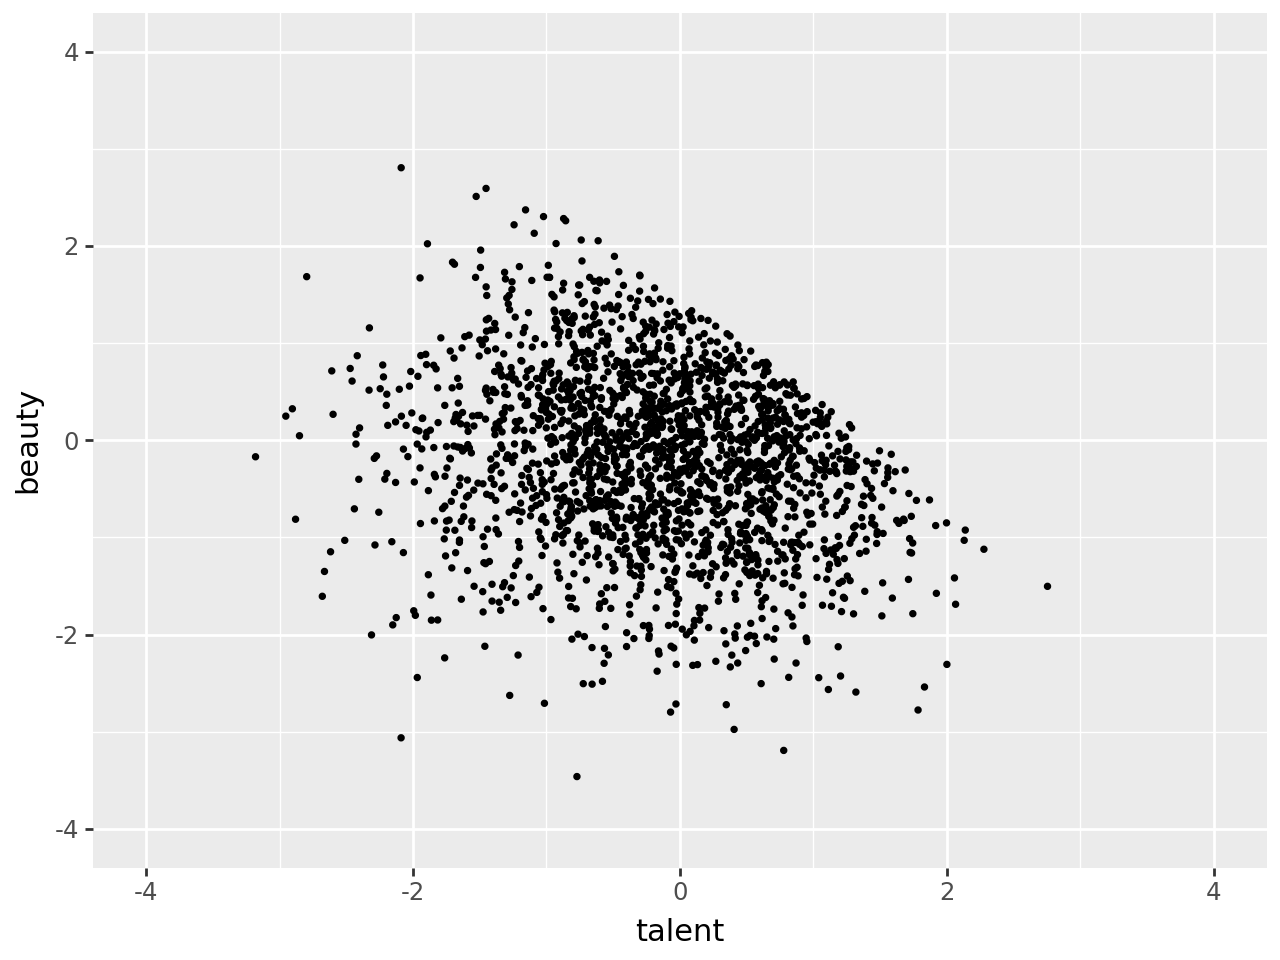

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from stargazer.stargazer import Stargazer

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1
start_is_born.head()


lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)